In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# 1. Load the Data
data = pd.read_csv('/home/fymsc15/Aditya_WF/AIML/Assignment03/50_Startups.csv')

In [16]:
# 2. Data Preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# 3. Train the Multiple Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)



# 4. Make Predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# 5. Evaluate the Model
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training Metrics:")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Training Metrics:
MSE: 81571001.80
RMSE: 9031.67
R-squared: 0.95

Testing Metrics:
MSE: 83502864.03
RMSE: 9137.99
R-squared: 0.93



Coefficients:
Coefficient for feature 0: 15.53
Coefficient for feature 1: -401.66
Coefficient for feature 2: 348.69
Coefficient for feature 3: 35726.29
Coefficient for feature 4: 851.30
Coefficient for feature 5: 4519.88
Intercept: 109446.45

Predicted Profit: $181566.92


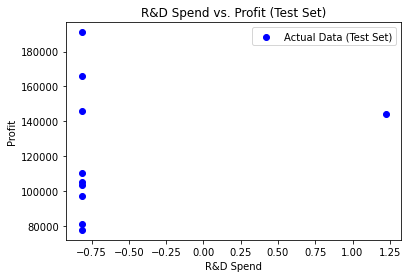

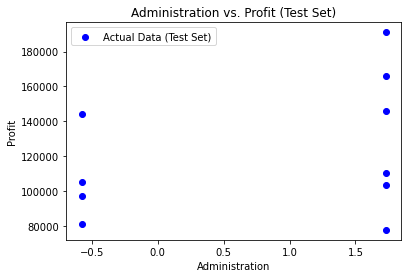

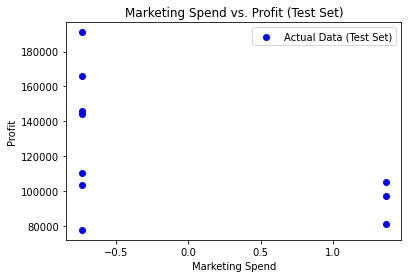

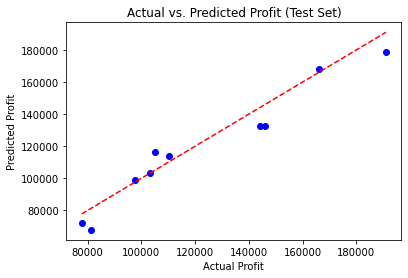

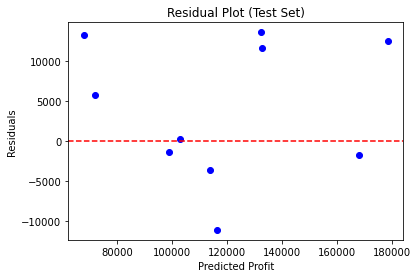

In [20]:


# 6. Print Coefficients
print("\nCoefficients:")
for i, coef in enumerate(regressor.coef_):
    print(f"Coefficient for feature {i}: {coef:.2f}")
print(f"Intercept: {regressor.intercept_:.2f}")

# 7. Example Prediction
new_startup = np.array([[160000, 130000, 300000, 'California']])
new_startup_encoded = ct.transform(new_startup)
new_startup_scaled = sc.transform(new_startup_encoded)
predicted_profit = regressor.predict(new_startup_scaled)
print(f"\nPredicted Profit: ${predicted_profit[0]:.2f}")


# 8. Visualizations
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend']

# 8.1. Individual Feature Scatter Plots
for feature in numerical_features:
    plt.scatter(X_test[:, data.columns.get_loc(feature)], y_test, color='blue', label='Actual Data (Test Set)')
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(f'{feature} vs. Profit (Test Set)')
    plt.legend()
    plt.show()

# 8.2. Predicted vs. Actual Profit
plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# 8.3. Residual Plot
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, color='blue')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()